In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file/"

# master_file input
-> 44584 rows, 290 cols, original dataset  
  -> 35000 rows 218 cols 

In [ ]:
master_file = pd.read_csv(BASE_PATH + 'Hyper_master_file_v4.csv', index_col=0)

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44584 entries, 0 to 44583
Columns: 290 entries, SEQN to Hyper
dtypes: float64(290)
memory usage: 99.0 MB


# Data Cleaning
- remove missing values > 10000 in each columns (missing over 20% in each columns) 
  - -> 203 columns remine
- remove missing values >= 20 in each row (missing over 10% in each columns)


In [ ]:
# check_list = []

# for col in master_file:
#     n = master_file[col].value_counts().reset_index()
#     if (n.shape[0] < 10) and (n.shape[0] > 1) and (n.iloc[-1,-1] == 1):
#       check_list.append(col)
# print(check_list)


In [ ]:
# master_file['Told_High_blood_pressure_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Told_High_blood_pressure_dummy'].value_counts().reset_index().iloc[-1,-1]

## Check there is only 1 data in the category (mannually decide whether replace with na)

In [ ]:
# master_file['Taking_insulin_now_1_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Taking_insulin_now_1_dummy'].replace({7: np.nan, 9:np.nan}, inplace = True)

In [ ]:
# master_file['Vigorous_work_activity_1_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Vigorous_work_activity_1_dummy'].replace({7: np.nan}, inplace = True)

In [ ]:
# master_file['Moderate work activity_1_dummy'].value_counts().reset_index()

In [ ]:
# master_file['Moderate work activity_1_dummy'].replace({7: np.nan}, inplace = True)

In [ ]:
# master_file['DR2_300'].value_counts().reset_index()

In [ ]:
# master_file['DR2_300'].replace({7: np.nan}, inplace = True)

In [ ]:
replace_dict = {}

dummy_col = []
for col in master_file.columns:
  if 'dummy' in col:
    dummy_col.append(col)

check_list = []

for col in dummy_col:
  values = master_file[col].value_counts(dropna=True).keys().tolist()
  counts = master_file[col].value_counts(dropna=True).tolist()
  valid = [i for i,v in enumerate(counts) if v < 10]
  c = len(valid)
  if c > 0:
    value_dict = dict(zip(values[-c:], counts[-c:]))
    replace_dict[col] = value_dict

In [ ]:
replace_dict

{'>100_cigarettes_inlife_1_dummy': {7.0: 6},
 'Country_of_birth_dummy': {77.0: 7, 99.0: 4},
 'Moderate work activity_1_dummy': {7.0: 2},
 'Moderate_recreational_activities_1_dummy': {7.0: 1, 9.0: 7},
 'Taking_insulin_now_1_dummy': {7.0: 2, 9.0: 5},
 'Vigorous_recreational_activities_1_dummy': {7.0: 1, 9.0: 5},
 'Vigorous_work_activity_1_dummy': {7.0: 2},
 'Walk_or_bicycle_1_dummy': {7.0: 1, 9.0: 3},
 'had_trouble_sleeping_1_dummy': {7.0: 2},
 'have_asthma_1_dummy': {7.0: 1},
 'have_diabetes_1_dummy': {7.0: 1},
 'have_prediabetes_1_dummy': {7.0: 1},
 'milk_product_consumption_freq_dummy': {7.0: 2, 9.0: 3},
 'milk_type_dummy': {77.0: 1}}

In [ ]:
master_file['>100_cigarettes_inlife_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['Country_of_birth_dummy'].replace({77.0: np.nan, 99.0:np.nan}, inplace = True)
master_file['Moderate work activity_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['Moderate_recreational_activities_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Taking_insulin_now_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Vigorous_recreational_activities_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Vigorous_work_activity_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['Walk_or_bicycle_1_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['had_trouble_sleeping_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['have_asthma_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['have_diabetes_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['have_prediabetes_1_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['milk_product_consumption_freq_dummy'].replace({7.0: np.nan, 9.0: np.nan}, inplace = True)
master_file['milk_type_dummy'].replace({77.0: np.nan}, inplace = True)


In [ ]:
check_list = []

for col in dummy_col:
  n = master_file[col].value_counts().reset_index()
  if n.shape[0] < 50 and (n.iloc[-1,1] < 10):
    check_list.append(col)

print(check_list)

[]


In [ ]:
check_list = []

for col in master_file:
    n = master_file[col].value_counts().reset_index()
    if (n.shape[0] < 10) and (n.shape[0] > 1) and (n.iloc[-1,-1] < 10):
      check_list.append(col)
print(check_list)

['DR1TWS_x', 'DRD350JQ', 'DRD350K', 'DRD370GQ', 'DR2_300', 'DR2TWS', 'DR2MRESP', 'DR2HELP']


In [ ]:
master_file['DR2_300'].value_counts(dropna = False)

2.0    28501
NaN     8622
3.0     4954
1.0     2293
9.0      212
7.0        2
Name: DR2_300, dtype: int64

In [ ]:
master_file['DR2_300'].replace({7: np.nan}, inplace = True)

In [ ]:
master_file['DR2HELP'].value_counts(dropna = False)

NaN     33559
12.0    10070
4.0       363
1.0       357
5.0       159
6.0        29
11.0       24
8.0        11
7.0        10
10.0        2
Name: DR2HELP, dtype: int64

In [ ]:
# master_file['Walk_or_bicycle_1_dummy'].value_counts()

## remove missing values > 10000 in each columns 

In [ ]:
# remove columns
col_list=list(master_file)
out_list=[]
for col_name in col_list:
  num = master_file[col_name].isnull().sum(axis=0)
  if num > 10000:
    out_list.append(col_name)

master_file=master_file.drop(columns=out_list)

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44584 entries, 0 to 44583
Columns: 203 entries, SEQN to Hyper
dtypes: float64(203)
memory usage: 69.4 MB


## remove missing values >= 20 in each row 
（less than 10% is missing)

In [ ]:
master_file['na_count'] = master_file.isnull().sum(axis=1)

In [ ]:
master_file[master_file['na_count'] < 20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35779 entries, 0 to 44583
Columns: 204 entries, SEQN to na_count
dtypes: float64(203), int64(1)
memory usage: 56.0 MB


In [ ]:
# remove rows
master_file = master_file[master_file['na_count'] < 20]

In [ ]:
master_file.drop(columns = {'na_count'}, inplace = True)

In [ ]:
master_file['Told_High_blood_pressure_dummy'].value_counts()

0.0    25761
1.0    10018
Name: Told_High_blood_pressure_dummy, dtype: int64

In [ ]:
master_file[master_file['Told_High_blood_pressure_dummy'] == 0]['Hyper'].value_counts()

0.0    21127
1.0     4634
Name: Hyper, dtype: int64

In [ ]:
master_file[master_file['Told_High_blood_pressure_dummy'] == 1]['Hyper'].value_counts()

1.0    8981
0.0    1037
Name: Hyper, dtype: int64

In [ ]:
# master_file = master_file[master_file['Told_High_blood_pressure_dummy'] == 0]

In [ ]:
master_file.drop(columns = {'Told_High_blood_pressure_dummy'}, inplace = True)

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35779 entries, 0 to 44583
Columns: 202 entries, SEQN to Hyper
dtypes: float64(202)
memory usage: 55.4 MB


In [ ]:
check_list = []

for col in master_file:
    n = master_file[col].value_counts().reset_index()
    if (n.shape[0] < 10) and (n.shape[0] > 1) and (n.iloc[-1,-1] < 10):
      check_list.append(col)
print(check_list)

['flu_pneumonia_ear_infection_dummy', 'DRQSDIET', 'DRD360']


In [ ]:
master_file['DR2LANG'].value_counts()

1.0    31642
2.0     3640
3.0      287
5.0      190
4.0       10
6.0       10
Name: DR2LANG, dtype: int64

In [ ]:
master_file['Household_reference_education_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['flu_pneumonia_ear_infection_dummy'].replace({7.0: np.nan}, inplace = True)
master_file['DBQ095Z_x'].replace({91.0: np.nan}, inplace = True)
master_file['DRQSDIET'].replace({9.0: np.nan}, inplace = True)
master_file['DRD360'].replace({7.0: np.nan}, inplace = True)
master_file['DR2LANG'].replace({4.0: np.nan, 6.0: np.nan}, inplace = True)

In [ ]:
check_list = []

for col in master_file:
    n = master_file[col].value_counts().reset_index()
    if (n.shape[0] < 10) and (n.shape[0] > 1) and (n.iloc[-1,-1] < 10):
      check_list.append(col)
print(check_list)

[]


# Encode categorical variables

In [ ]:
copy_master_file = master_file.copy()

In [ ]:
dummy_col = []
for col in master_file.columns:
  if (master_file[col].nunique() < 10 or 'dummy' in col) and (col != 'Hyper'):
    dummy_col.append(col)
    if master_file[col].nunique() > 10:
      print(col)

Income_dummy


In [ ]:
len(dummy_col)

41

In [ ]:
encoders = dict()

for col_name in dummy_col:
    series = master_file[col_name]
    label_encoder = LabelEncoder()
    master_file[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

# Split the data set to train, validation, test (6: 2: 2)

In [ ]:
X= master_file.loc[:, master_file.columns != 'Hyper']
X= X.loc[:, X.columns != 'na_count']
y= master_file.loc[:, 'Hyper']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=123, stratify = y_train)

In [ ]:
df_fillna=X_train.loc[:,:]
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Columns: 201 entries, SEQN to DR2BWATZ
dtypes: float64(191), int64(10)
memory usage: 33.1 MB


In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
missing_df=df_fillna.isna().sum()
pure_miss = missing_df.to_frame()

# obtain column names for rows with missing values
pure_miss[pure_miss.iloc[:,0]!=0]

,0
Household_reference_education_dummy,3739
Education_dummy,478
Income_dummy,966
Poverty_dummy,1790
Country_of_birth_dummy,8
Weight(kg),168
Height(cm),167
BMI,195
Arm_Circumference,455
Waist_Circumference,631


In [ ]:
# from sklearn.impute import KNNImputer

In [ ]:
# df_fillna.head()

In [ ]:
df_fillna=df_fillna.drop(columns={'SEQN'})

## Numerical variables fill in NA

In [ ]:
dummy_col = []
for col in df_fillna.columns:
  if df_fillna[col].nunique() < 10 or 'dummy' in col:
    dummy_col.append(col)
    if df_fillna[col].nunique() > 10:
      print(col)

Income_dummy


In [ ]:
numerical_cols = [c for c in df_fillna.columns if c not in dummy_col]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42, initial_strategy ='mean')
df_fillna[numerical_cols] = imputer.fit_transform(df_fillna[numerical_cols])
#train_imputed = pd.DataFrame(imputed, columns=numerical_cols)

In [ ]:
df_fillna.isna().sum()

gender_dummy                                   0
age                                            0
race_dummy                                     0
Household_reference_education_dummy         3739
Education_dummy                              478
Income_dummy                                 966
Poverty_dummy                               1790
Country_of_birth_dummy                         8
Weight(kg)                                     0
Height(cm)                                     0
BMI                                            0
Arm_Circumference                              0
Waist_Circumference                            0
Spending_on_nonfood                            0
Spending_on_eating_out                         0
Spending_on_carryout_deliverred                0
Spending_on_food                               0
milk_type_dummy                             3223
milk_product_consumption_freq_dummy            2
eat_outside                                    0
ready_to_eat_food   

## Categorical variables fill NA

In [ ]:
%cd /content/drive/MyDrive/Hypertension_Final_Project/cleaned_file

/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file


In [ ]:
# class MultiColumnLabelEncoder:

#     def __init__(self, columns=None):
#         self.columns = columns # array of column names to encode


#     def fit(self, X, y=None):
#         self.encoders = {}
#         columns = X.columns if self.columns is None else self.columns
#         for col in columns:
#             self.encoders[col] = LabelEncoder().fit(X[col])
#         return self


#     def transform(self, X):
#         output = X.copy()
#         columns = X.columns if self.columns is None else self.columns
#         for col in columns:
#             output[col] = self.encoders[col].transform(X[col])
#         return output


#     def fit_transform(self, X, y=None):
#         return self.fit(X,y).transform(X)


#     def inverse_transform(self, X):
#         output = X.copy()
#         columns = X.columns if self.columns is None else self.columns
#         for col in columns:
#             output[col] = self.encoders[col].inverse_transform(X[col])
#         return output

In [ ]:
# convert the categorical variable



imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter= 3, random_state=42)

df_fillna.loc[:,dummy_col] = imp_cat.fit_transform(df_fillna.loc[:,dummy_col])

# # inverse the transfer back to orginal categroy
# for col in dummy_col:
#   random_forest_imputed.loc[:,col] = encoders[col].inverse_transform(random_forest_imputed[col].astype(int))

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
df_fillna['Household_reference_education_dummy'].value_counts(dropna = False)

3.0    6420
4.0    5063
2.0    4867
1.0    3018
0.0    2061
5.0      38
Name: Household_reference_education_dummy, dtype: int64

In [ ]:
X_train['Household_reference_education_dummy'].value_counts(dropna = False)

3.0    5109
4.0    4160
2.0    4012
NaN    3739
1.0    2597
0.0    1812
5.0      38
Name: Household_reference_education_dummy, dtype: int64

In [ ]:
# # convert the categorical variable
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier


# # Copy the data
# random_forest_imputed = df_fillna.loc[:,dummy_col]
# method = MultiColumnLabelEncoder(columns=dummy_col)

# # random_forest_imputed = random_forest_imputed.apply(lambda series: pd.Series(
# #         MultiColumnLabelEncoder(columns=dummy_col).fit_transform(series[series.notnull()]),
# #         index=series[series.notnull()].index
# #     ))

# random_forest_imputed = method.fit_transform(random_forest_imputed)

# imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
#                                initial_strategy='most_frequent',
#                                max_iter=1, random_state=42)

# random_forest_imputed.loc[:,dummy_col] = imp_cat.fit_transform(random_forest_imputed)



In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor

# # Copy the data
# extra_tree_imputed = df_fillna.loc[:,dummy_col]

# # Init
# tree_imp = IterativeImputer(
#     estimator=ExtraTreesRegressor(max_depth=30, random_state=42), max_iter=1, random_state=42
# )

# # Tranform
# extra_tree_imputed.loc[:,dummy_col] = tree_imp.fit_transform(extra_tree_imputed)

In [ ]:
# random_forest_imputed.columns

In [ ]:
# encoders['Moderate_recreational_activities_1_dummy'].inverse_transform(random_forest_imputed['Moderate_recreational_activities_1_dummy'].astype(int))

In [ ]:
# # scaler variables before the apply the KNN fillna methods to prevent the difference on scaler in each variable
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df_fillna), columns = df_fillna.columns)


In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Columns: 201 entries, SEQN to DR2BWATZ
dtypes: float64(191), int64(10)
memory usage: 33.1 MB


In [ ]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Columns: 200 entries, gender_dummy to DR2BWATZ
dtypes: float64(200)
memory usage: 32.9 MB


In [ ]:
df_fillna.isna().sum()

gender_dummy                                0
age                                         0
race_dummy                                  0
Household_reference_education_dummy         0
Education_dummy                             0
Income_dummy                                0
Poverty_dummy                               0
Country_of_birth_dummy                      0
Weight(kg)                                  0
Height(cm)                                  0
BMI                                         0
Arm_Circumference                           0
Waist_Circumference                         0
Spending_on_nonfood                         0
Spending_on_eating_out                      0
Spending_on_carryout_deliverred             0
Spending_on_food                            0
milk_type_dummy                             0
milk_product_consumption_freq_dummy         0
eat_outside                                 0
ready_to_eat_food                           0
frozen_food                       

## Apply the fillna to validation and test set

In [ ]:
X_test=X_test.drop(columns={'SEQN'})
X_valid=X_valid.drop(columns={'SEQN'})

### apply to validation set

In [ ]:

# fillna for numerical variable
X_valid[numerical_cols] = imputer.transform(X_valid[numerical_cols])

# fillna for categorical variable
X_valid[dummy_col] = imp_cat.transform(X_valid[dummy_col])


In [ ]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 29283 to 3791
Columns: 200 entries, gender_dummy to DR2BWATZ
dtypes: float64(200)
memory usage: 11.0 MB


### apply to test set

In [ ]:
# fillna for numerical variable
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

# fillna for categorical variable
X_test[dummy_col] = imp_cat.transform(X_test[dummy_col])


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 10284 to 43800
Columns: 200 entries, gender_dummy to DR2BWATZ
dtypes: float64(200)
memory usage: 11.0 MB


In [ ]:
pd.DataFrame(X_valid).isna().sum()

gender_dummy                                0
age                                         0
race_dummy                                  0
Household_reference_education_dummy         0
Education_dummy                             0
Income_dummy                                0
Poverty_dummy                               0
Country_of_birth_dummy                      0
Weight(kg)                                  0
Height(cm)                                  0
BMI                                         0
Arm_Circumference                           0
Waist_Circumference                         0
Spending_on_nonfood                         0
Spending_on_eating_out                      0
Spending_on_carryout_deliverred             0
Spending_on_food                            0
milk_type_dummy                             0
milk_product_consumption_freq_dummy         0
eat_outside                                 0
ready_to_eat_food                           0
frozen_food                       

In [ ]:
# df1 = scaler.inverse_transform(df)
# df_test_x=scaler.inverse_transform(test_S)
# df_valid_x=scaler.inverse_transform(valid_S)

In [ ]:
# df1=pd.DataFrame(df1,columns = df_fillna.columns)
# df_test_x=pd.DataFrame(df_test_x,columns = df_fillna.columns)
# df_valid_x=pd.DataFrame(df_valid_x,columns = df_fillna.columns)

In [ ]:
# df1.head()

In [ ]:
# #df1 already filled na, next step: get_dummy
# df1.isna().sum()

In [ ]:
# df1.info()

In [ ]:
# df_test_x.info()

In [ ]:
# df_test_x.isna().sum().to_frame()[~(df_test_x.isna().sum().to_frame() ==0).any(axis=1)]

In [ ]:
# df_valid_x.info()

In [ ]:
# df_valid_x.isna().sum().to_frame()[~(df_valid_x.isna().sum().to_frame() ==0).any(axis=1)]

## combine train, validation and test to get dummy
- concatnate df1:; df_test_x:; df_valid_x:  ===>result

In [ ]:
frames = [df_fillna, X_valid, X_test]
result = pd.concat(frames)

In [ ]:
# inverse the transfer back to orginal categroy
for col in dummy_col:
  result[col] = encoders[col].inverse_transform(result[col].astype(int))

In [ ]:
result['Household_reference_education_dummy'].value_counts(dropna = False)

4.0    10697
5.0     8493
3.0     8111
2.0     5032
1.0     3388
9.0       58
Name: Household_reference_education_dummy, dtype: int64

In [ ]:
copy_master_file['Household_reference_education_dummy'].value_counts(dropna = False)

4.0    8507
5.0    6995
3.0    6693
NaN    6193
2.0    4341
1.0    2993
9.0      57
Name: Household_reference_education_dummy, dtype: int64

In [ ]:
result.isna().sum()

gender_dummy                                0
age                                         0
race_dummy                                  0
Household_reference_education_dummy         0
Education_dummy                             0
Income_dummy                                0
Poverty_dummy                               0
Country_of_birth_dummy                      0
Weight(kg)                                  0
Height(cm)                                  0
BMI                                         0
Arm_Circumference                           0
Waist_Circumference                         0
Spending_on_nonfood                         0
Spending_on_eating_out                      0
Spending_on_carryout_deliverred             0
Spending_on_food                            0
milk_type_dummy                             0
milk_product_consumption_freq_dummy         0
eat_outside                                 0
ready_to_eat_food                           0
frozen_food                       

In [ ]:
# dummy_col = []
# for col in result.columns:
#   if result[col].nunique() < 10:
#     dummy_col.append(col)
fillna_dummy = pd.get_dummies(result, columns = dummy_col, drop_first = True)
fillna_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35779 entries, 40434 to 43800
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), uint8(77)
memory usage: 46.3 MB


In [ ]:
fillna_dummy.isna().sum()

age                                             0
Weight(kg)                                      0
Height(cm)                                      0
BMI                                             0
Arm_Circumference                               0
Waist_Circumference                             0
Spending_on_nonfood                             0
Spending_on_eating_out                          0
Spending_on_carryout_deliverred                 0
Spending_on_food                                0
eat_outside                                     0
ready_to_eat_food                               0
frozen_food                                     0
Sleep_hours                                     0
WTDRD1_x                                        0
WTDR2D_x                                        0
DR1DBIH                                         0
DR1TNUMF                                        0
DR1TKCAL                                        0
DR1TPROT                                        0


In [ ]:
fillna_dummy.head()

,age,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,Spending_on_nonfood,Spending_on_eating_out,Spending_on_carryout_deliverred,Spending_on_food,...,DR2DAY_4.0,DR2DAY_5.0,DR2DAY_6.0,DR2DAY_7.0,DR2LANG_2.0,DR2LANG_3.0,DR2LANG_5.0,DR2_300_2.0,DR2_300_3.0,DR2_300_9.0
41913,72.0,62.200000,157.700000,25.000000,28.500000,99.500000,1.656920e-01,1.052165e-81,1.052165e-81,0.834308,...,0,0,0,0,1,0,0,1,0,0
28220,16.0,71.171409,162.910373,26.526265,30.573193,87.668499,6.542552e-82,9.090909e-02,6.542552e-82,0.909091,...,0,0,0,0,0,0,0,1,0,0
35106,16.0,60.900000,170.700000,20.900000,26.300000,72.100000,6.920007e-82,3.846154e-01,2.564103e-02,0.589744,...,0,0,0,0,0,0,0,1,0,0
8843,44.0,80.300000,175.700000,26.010000,32.500000,90.100000,7.710865e-82,2.857143e-01,7.710865e-82,0.714286,...,0,0,0,0,0,0,0,1,0,0
16354,48.0,107.300000,171.100000,36.700000,36.500000,128.200000,5.681690e-82,2.105263e-01,5.263158e-02,0.736842,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
y_frames = [y_train, y_valid, y_test]
y_result = pd.concat(y_frames)

In [ ]:
fillna_dummy.to_csv('clean_get_dummy_fillna_master_v2.csv')
y_result.to_csv('y_master_v2.csv')

## *****read from here

## seperate train, validation and test


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = "/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file/"
fillna_dummy = pd.read_csv(BASE_PATH + 'clean_get_dummy_fillna_master_v2.csv', index_col=0)
y_result = pd.read_csv(BASE_PATH + 'y_master_v2.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df_fillna.info()

In [ ]:
X_train=fillna_dummy.iloc[:21467,]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), int64(77)
memory usage: 38.8 MB


In [ ]:
y_train=y_result.iloc[:21467,]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hyper   21467 non-null  float64
dtypes: float64(1)
memory usage: 335.4 KB


In [ ]:
# X_valid.info()

In [ ]:
X_valid=fillna_dummy.iloc[21467:(21467+7156),]
X_valid.info()
X_valid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 29283 to 3791
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), int64(77)
memory usage: 12.9 MB


,age,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,Spending_on_nonfood,Spending_on_eating_out,Spending_on_carryout_deliverred,Spending_on_food,...,DR2DAY_4.0,DR2DAY_5.0,DR2DAY_6.0,DR2DAY_7.0,DR2LANG_2.0,DR2LANG_3.0,DR2LANG_5.0,DR2_300_2.0,DR2_300_3.0,DR2_300_9.0
29283,14.0,38.5,169.3,13.40,18.5,68.8,5.021028e-82,0.279070,0.186047,0.534884,...,1,0,0,0,0,0,0,1,0,0
36274,15.0,51.6,162.8,19.50,25.5,65.5,6.204144e-82,0.183908,0.068966,0.747126,...,0,1,0,0,0,0,0,1,0,0
33902,19.0,71.4,167.2,25.50,32.0,82.5,5.330490e-02,0.136461,0.138593,0.671642,...,0,0,1,0,0,0,0,0,1,0
40623,80.0,55.8,150.0,24.80,26.8,86.3,6.927832e-02,0.190588,0.035442,0.720977,...,0,0,1,0,0,0,0,1,0,0
13992,20.0,64.3,169.4,22.41,28.8,80.0,5.025703e-82,0.279330,0.099628,0.621043,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
y_valid=y_result.iloc[21467:(21467+7156),]
y_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 29283 to 3791
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hyper   7156 non-null   float64
dtypes: float64(1)
memory usage: 111.8 KB


In [ ]:
# X_test.info()

In [ ]:
X_test=fillna_dummy.iloc[(21467+7156):,]
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 10284 to 43800
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), int64(77)
memory usage: 12.9 MB


,age,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,Spending_on_nonfood,Spending_on_eating_out,Spending_on_carryout_deliverred,Spending_on_food,...,DR2DAY_4.0,DR2DAY_5.0,DR2DAY_6.0,DR2DAY_7.0,DR2LANG_2.0,DR2LANG_3.0,DR2LANG_5.0,DR2_300_2.0,DR2_300_3.0,DR2_300_9.0
10284,80.0,68.1,156.1,27.95,32.0,97.9,2.698803e-81,2.698803e-81,2.698803e-81,1.000000,...,0,0,0,0,0,0,0,0,0,0
21855,9.0,30.7,136.3,16.50,20.5,58.7,9.813828e-82,2.727273e-01,9.813828e-82,0.727273,...,1,0,0,0,0,0,0,1,0,0
7948,69.0,66.9,163.4,25.06,28.5,96.8,2.522245e-81,2.990654e-01,2.522245e-81,0.700935,...,1,0,0,0,0,0,0,1,0,0
13403,62.0,92.4,169.7,32.09,36.2,107.4,9.090909e-02,3.636364e-01,4.585901e-82,0.545455,...,1,0,0,0,0,0,0,1,0,0
6269,9.0,35.9,134.1,19.96,22.7,71.8,7.766339e-82,1.223022e-01,1.438849e-02,0.863309,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
y_test=y_result.iloc[(21467+7156):,]
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 10284 to 43800
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hyper   7156 non-null   float64
dtypes: float64(1)
memory usage: 111.8 KB


#VIF (variance Inflation Factor)

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_cols = X_train.columns

  
# # the independent variables set
# X_train_drop = X_train[X_train_cols]
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_train_drop.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X_train_drop.values, i)
#                           for i in range(len(X_train_drop.columns))]
  
# print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                          feature           VIF
0                                             age  1.112103e+01
1                                      Weight(kg)  7.021766e+02
2                                      Height(cm)  2.129820e+03
3                                             BMI  8.456873e+02
4                               Arm_Circumference  3.265735e+02
5                             Waist_Circumference  4.002439e+02
6                             Spending_on_nonfood  2.700901e+01
7                          Spending_on_eating_out  1.728418e+02
8                 Spending_on_carryout_deliverred  1.871120e+01
9                                Spending_on_food  1.326685e+03
10                                    eat_outside  2.313915e+00
11                              ready_to_eat_food  1.143733e+00
12                                    frozen_food  1.220404e+00
13                                    Sleep_hours  1.117684e+01
14                                      

In [ ]:
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
84,DR1_330Z,inf
85,DR1BWATZ,inf
86,WTDRD1_y,inf
87,WTDR2D_y,inf
156,DR2_320Z,inf
157,DR2_330Z,inf
158,DR2BWATZ,inf
15,WTDR2D_x,inf
14,WTDRD1_x,inf
83,DR1_320Z,inf


## add a constant column to perform VIF

In [ ]:
X_train['constant'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train_cols = X_train.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# drop columns with highest variance_inflation_factor
def drop_columns(data):

  X_train_cols = data.columns
  # the independent variables set
  X_train_drop = data[X_train_cols]
    
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X_train_drop.columns
    
  # calculating VIF for each feature
  for i in range(len(X_train_drop.columns)):
    vif_data.loc[i, "VIF"] = [variance_inflation_factor(X_train_drop.values, i)]

  
  # identify feature with highest VIF
  columns = vif_data.loc[vif_data['VIF'] == max(vif_data['VIF']),'feature']
  vif_value = max(vif_data['VIF'])
  if columns.values[0] == 'constant':
    second_largest = list(vif_data['VIF'].nlargest(2))[1]
    columns = vif_data.loc[vif_data['VIF'] == second_largest,'feature']
    vif_value = second_largest
  return [columns, vif_value]

In [ ]:
X_train_try = X_train.copy()

In [ ]:
# drop_columns(X_train_try)

In [ ]:
# drop_col

299    constanct
Name: feature, dtype: object

In [ ]:
while True:
  result = drop_columns(X_train_try)
  print(result)
  if result[1] < 10:
    break
  else:
    drop_col = result[0]
    if len(drop_col) > 1:
      # if the drop_col has more than 1 values, drop inf
      X_train_try =  X_train_try.loc[:,~X_train_try.columns.isin(drop_col)]
    else:
      X_train_try =  X_train_try.loc[:, X_train_try.columns != drop_col.values[0]]
    print(len(X_train_try.columns))


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[14     WTDRD1_x
15     WTDR2D_x
83     DR1_320Z
84     DR1_330Z
85     DR1BWATZ
86     WTDRD1_y
87     WTDR2D_y
156    DR2_320Z
157    DR2_330Z
158    DR2BWATZ
Name: feature, dtype: object, inf]
227
[110    DR2TFDFE
Name: feature, dtype: object, 113881.28635672448]
226
[97    DR2TVARA
Name: feature, dtype: object, 104031.00826081226]
225
[29    DR1TVARA
Name: feature, dtype: object, 83812.66916557707]
224
[41    DR1TFDFE
Name: feature, dtype: object, 82014.19203981958]
223
[9    Spending_on_food
Name: feature, dtype: object, 15456.8000568962]
222
[103    DR2TFOLA
Name: feature, dtype: object, 11220.728362911823]
221
[37    DR1TFOLA
Name: feature, dtype: object, 4808.9660581698845]
220
[15    DR1TKCAL
Name: feature, dtype: object, 4700.365327533928]
219
[79    DR2TKCAL
Name: feature, dtype: object, 3488.6612640802514]
218
[22    DR1TPFAT
Name: feature, dtype: object, 2192.1448924433835]
217
[85    DR2TPFAT
Name: feature, dtype: object, 2002.929375704018]
216
[83    DR2TSFAT
Name: featu

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
X_train_try.head()

,age,Height(cm),Arm_Circumference,Waist_Circumference,Spending_on_nonfood,Spending_on_eating_out,Spending_on_carryout_deliverred,eat_outside,ready_to_eat_food,frozen_food,...,DR2DAY_5.0,DR2DAY_6.0,DR2DAY_7.0,DR2LANG_2.0,DR2LANG_3.0,DR2LANG_5.0,DR2_300_2.0,DR2_300_3.0,DR2_300_9.0,constant
40434,29.0,160.3,24.9,71.6,5.140577e-82,0.095238,4.761905e-02,7.000000e+00,5.397605e-79,1.500000e+01,...,1,0,0,0,0,0,0,1,0,1
5986,75.0,163.1,47.6,131.9,1.349401e-81,0.250000,1.349401e-81,1.000000e+00,5.397605e-79,5.397605e-79,...,0,0,0,0,0,0,1,0,0,1
26346,20.0,162.8,31.5,86.8,2.895022e-02,0.579545,4.383117e-02,2.000000e+00,5.000000e+00,1.000000e+00,...,0,0,0,0,0,0,1,0,0,1
12229,80.0,148.6,21.4,68.0,3.598404e-81,0.666667,3.598404e-81,7.000000e+00,3.000000e+01,5.397605e-79,...,0,0,0,0,0,0,1,0,0,1
7117,15.0,183.9,33.2,89.0,1.199468e-81,0.111111,1.199468e-81,5.397605e-79,5.397605e-79,5.000000e+00,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
# vif_data.loc[vif_data['VIF'] == max(vif_data['VIF']),'feature']


23                      WTDRD1_x
24                      WTDR2D_x
94                      DR1_320Z
95                      DR1_330Z
96                      DR1BWATZ
98                      WTDRD1_y
99                      WTDR2D_y
168                     DR2_320Z
169                     DR2_330Z
170                     DR2BWATZ
198    have_diabetes_1_dummy_1.6
236      have_asthma_1_dummy_1.4
Name: feature, dtype: object

In [ ]:
# df1['DR2BWATZ'].value_counts()

In [ ]:
# vif_data.loc[vif_data['VIF'] == max(vif_data['VIF']),:]


,feature,VIF
23,WTDRD1_x,inf
24,WTDR2D_x,inf
94,DR1_320Z,inf
95,DR1_330Z,inf
96,DR1BWATZ,inf
98,WTDRD1_y,inf
99,WTDR2D_y,inf
168,DR2_320Z,inf
169,DR2_330Z,inf
170,DR2BWATZ,inf


In [ ]:
# vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
170,DR2BWATZ,inf
96,DR1BWATZ,inf
95,DR1_330Z,inf
198,have_diabetes_1_dummy_1.6,inf
169,DR2_330Z,inf
98,WTDRD1_y,inf
168,DR2_320Z,inf
236,have_asthma_1_dummy_1.4,inf
94,DR1_320Z,inf
23,WTDRD1_x,inf


#Model

1.   List item
2.   List item



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [ ]:
# X_train_drop=X_train.drop(columns={'Told_High_blood_pressure_dummy_1.0'})
# X_valid_drop=X_valid.drop(columns={'Told_High_blood_pressure_dummy_1.0'})
# X_test_drop=X_test.drop(columns={'Told_High_blood_pressure_dummy_1.0'})

In [ ]:
# X_train_drop=X_train_drop.drop(columns={'Hypertension_dummy_1.0'})
# X_valid_drop=X_valid_drop.drop(columns={'Hypertension_dummy_1.0'})
# X_test_drop=X_test_drop.drop(columns={'Hypertension_dummy_1.0'})

In [ ]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = pd.Series(model.predict(X_valid))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))
# print("Precision:", metrics.precision_score(y_valid, y_pred))
# print("Recall:", metrics.recall_score(y_valid, y_pred))

Accuracy: 0.6312410841654779
Precision: 0.555858310626703
Recall: 0.24984690753214941


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Create the model with 100 trees
# model_rf = RandomForestClassifier(n_estimators=100, 
#                                bootstrap = True,
#                                max_features = 'sqrt')
# # Fit on training data
# model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [ ]:
# # Actual class predictions
# rf_predictions = model_rf.predict(X_valid)
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_valid, rf_predictions))

Accuracy =  0.8756538278649548


In [ ]:
#y_valid

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

# train_probs = model_rf.predict_proba(X_train)[:,1] 
# probs = model_rf.predict_proba(X_valid)[:, 1]
# train_predictions = model_rf.predict(X_train)

# print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
# print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')


Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9333342694603552


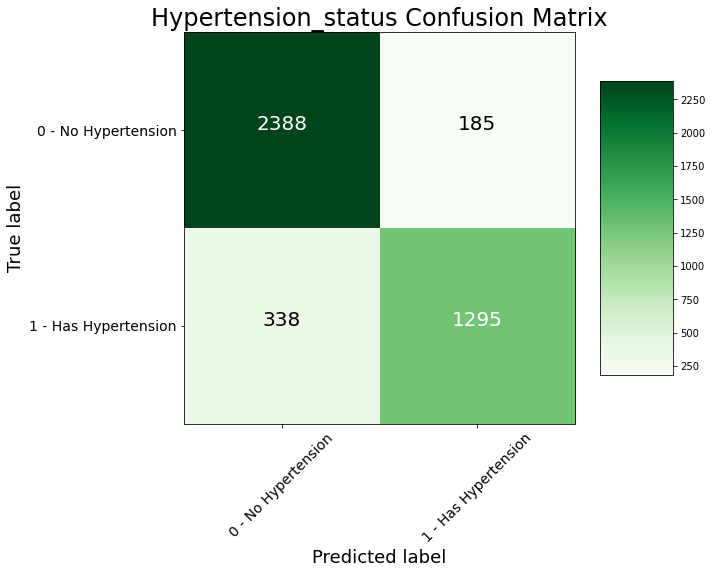

In [ ]:
# import itertools
# import matplotlib.pyplot as plt

# def plot_confusion_matrix(cm, classes, normalize = False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Greens): # can change color 
#     plt.figure(figsize = (10, 10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, size = 24)
#     plt.colorbar(aspect=4)
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45, size = 14)
#     plt.yticks(tick_marks, classes, size = 14)
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     # Label the plot
#     for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
#       plt.text(j, i, format(cm[i, j], fmt),\
#               fontsize = 20,\
#               horizontalalignment="center",\
#               color="white" if cm[i, j] > thresh else "black")
#       plt.grid(None)
#       plt.tight_layout()
#       plt.ylabel('True label', size = 18)
#       plt.xlabel('Predicted label', size = 18)

# # Let's plot it out
# cm = confusion_matrix(y_valid, rf_predictions)
# plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
#                       title = 'Hypertension_status Confusion Matrix')

In [ ]:
# feat_labels = X_train.columns

In [ ]:
# feature_importance = []
# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, model_rf.feature_importances_):
#     feature_importance.append(feature)

In [ ]:
# sorted(feature_importance, key=lambda x: x[1], reverse=True)

[('Told_High_blood_pressure_dummy_1.0', 0.13300968120740597),
 ('age', 0.10029465384827278),
 ('Hypertension_dummy_1.0', 0.055769180449673945),
 ('Waist_Circumference', 0.03219396397944291),
 ('Vigorous_recreational_activities_1_dummy_2.0', 0.02134887498174454),
 ('BMI', 0.02091016043952907),
 ('Weight(kg)', 0.01574570135764412),
 ('have_diabetes_1_dummy_2.0', 0.01329290038663001),
 ('Arm_Circumference', 0.011286041247101739),
 ('Education_dummy', 0.008216499443709922),
 ('>100_cigarettes_inlife_1_dummy', 0.006622453626279082),
 ('DR1TCAFF', 0.0063951705920755365),
 ('blood_transfusion_1_dummy_2.0', 0.005895520118491042),
 ('DR2TCAFF', 0.005817497422843443),
 ('Height(cm)', 0.005768705160985947),
 ('have_prediabetes_1_dummy_2.0', 0.005325913764600267),
 ('Marital_Status_dummy', 0.005004620789249879),
 ('DR2TMOIS', 0.004691165803195167),
 ('DR1TSUGR', 0.004473023909716141),
 ('DR2TNUMF', 0.004461076686636043),
 ('WTDRD1_y', 0.0043864582271841085),
 ('WTDRD1_x', 0.004356832509210994),
 (

In [ ]:
# import xgboost as xgb
# model = xgb.XGBClassifier()
# model.fit(X_train_drop, y_train) #For sklearn no one hot encoding

# #Now predict using the trained XG model. 
# prediction = model.predict(X_valid_drop)

# #Print overall accuracy
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_valid, prediction))

Accuracy =  0.8340466000951022


# without VIF

## logistic Regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score


In [ ]:
# X_train_cut = X_train.iloc[:5000, :]
# y_train_cut = y_train.iloc[:5000,:]

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test))
y_pred_proba = model.predict_proba(X_valid)[::,1]

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
# print('Test ROC AUC  Score': roc_auc_score(y_valid, probs))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6439351593068754
Precision: 0.5698324022346368
Recall: 0.2622107969151671


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


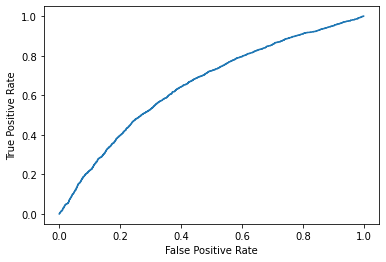

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

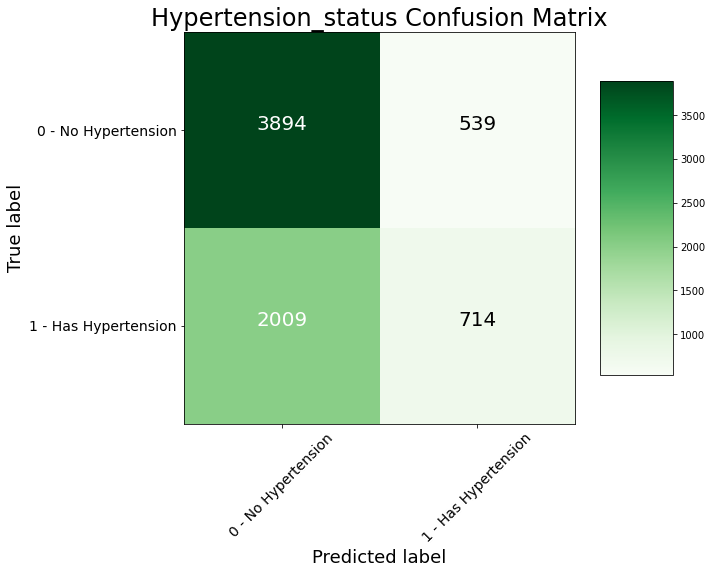

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),\
              fontsize = 20,\
              horizontalalignment="center",\
              color="white" if cm[i, j] > thresh else "black")
      plt.grid(None)
      plt.tight_layout()
      plt.ylabel('True label', size = 18)
      plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

## Random Forest

In [ ]:
y_result['Hyper'].value_counts()

0.0    21127
1.0     4634
Name: Hyper, dtype: int64

In [ ]:
y_train.head()

,Hyper
41913,1.0
28220,0.0
35106,0.0
8843,0.0
16354,0.0


In [ ]:
y_train['Hyper'].value_counts()

0.0    12676
1.0     2780
Name: Hyper, dtype: int64

In [ ]:
# # Create the model with 100 trees
# model_rf = RandomForestClassifier(n_estimators=100, 
#                                bootstrap = True,
#                                max_features = 'sqrt')
# # Fit on training data
# model_rf.fit(X_train_cut, y_train)
# # Actual class predictions
# rf_predictions = model_rf.predict(X_valid)
# from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_valid, rf_predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy =  0.8200698757763976


In [ ]:
# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model_rf.fit(X_train, y_train)
# Actual class predictions
rf_predictions = model_rf.predict(X_valid)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

train_probs = model_rf.predict_proba(X_train)[:,1] 
probs = model_rf.predict_proba(X_valid)[:, 1]
train_predictions = model_rf.predict(X_train)

print ("Accuracy = ", accuracy_score(y_valid, rf_predictions))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy =  0.7973728339854668
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8720037736539934


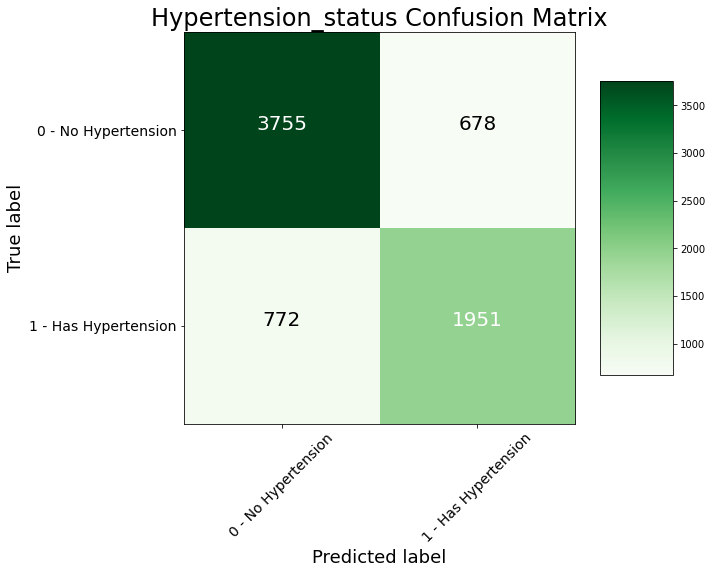

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),\
              fontsize = 20,\
              horizontalalignment="center",\
              color="white" if cm[i, j] > thresh else "black")
      plt.grid(None)
      plt.tight_layout()
      plt.ylabel('True label', size = 18)
      plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_valid, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
feat_labels = X_train.columns
feature_importance = []
# Print the name and gini importance of each feature
for feature in zip(feat_labels, model_rf.feature_importances_):
    feature_importance.append(feature)

sorted(feature_importance, key=lambda x: x[1], reverse=True)

[('age', 0.13197515459236242),
 ('Waist_Circumference', 0.05493173461723083),
 ('BMI', 0.025160269368455442),
 ('Arm_Circumference', 0.0233706053075147),
 ('have_diabetes_1_dummy_2.0', 0.021561284149152614),
 ('Weight(kg)', 0.019751302088783847),
 ('DR2TCAFF', 0.012155637004578472),
 ('Vigorous_recreational_activities_1_dummy_2.0', 0.009874593242662178),
 ('Sleep_hours', 0.00973280563438091),
 ('Height(cm)', 0.009298456937046302),
 ('blood_transfusion_1_dummy_2.0', 0.008467489759664798),
 ('DR1TCAFF', 0.007918205685824119),
 ('had_trouble_sleeping_1_dummy_2.0', 0.0069327361013195995),
 ('DR2TNUMF', 0.006922291758525054),
 ('DR2TMOIS', 0.006008695740944164),
 ('DR1TMOIS', 0.005965919712917545),
 ('DR2TBCAR', 0.005663585309112101),
 ('DR1TCARB', 0.005648807654677052),
 ('DR1TSUGR', 0.005562189666958531),
 ('DR2TCALC', 0.005394059023796649),
 ('DR2TLZ', 0.0053814173076096525),
 ('DR2TSUGR', 0.005338346862814381),
 ('WTDR2D_y', 0.00533175123622189),
 ('WTDR2D_x', 0.005317716748975817),
 ('

# with VIF

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# X_train_try.drop(columns = {'constant'}, inplace = True)

In [ ]:
%cd /content/drive/MyDrive/Hypertension_Final_Project/cleaned_file

/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file


In [ ]:
# X_train_try.to_csv('X_train_try.csv') 

In [ ]:
BASE_PATH = "/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file/"
X_train_try= pd.read_csv(BASE_PATH + 'X_train_try.csv', index_col=0)

In [ ]:
# X_train_try_1.columns == X_train_try.columns

In [ ]:
# X_train_try

In [ ]:
remining_columns = X_train_try.columns
X_valid_try = X_valid.loc[:, X_valid.columns.isin(remining_columns)]
X_test_try = X_test.loc[:, X_test.columns.isin(remining_columns)]

## Logistic Regression

In [ ]:
logr_model_vif_pip = Pipeline([('sts', StandardScaler()),
                               ('logr', LogisticRegression())])
logr_model_vif_pip.fit(X_train_try, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('sts', StandardScaler()), ('logr', LogisticRegression())])

In [ ]:
y_pred = pd.Series(logr_model_vif_pip.predict(X_valid_try))
y_train_pred = pd.Series(logr_model_vif_pip.predict(X_train_try))

y_pred_proba = logr_model_vif_pip.predict_proba(X_valid_try)[::,1]
y_train_proba = logr_model_vif_pip.predict_proba(X_train_try)[::,1]


print ("Accuracy = ", accuracy_score(y_valid, y_pred))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_proba)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, y_pred_proba)}')
print(f'Train F1: {f1_score(y_train, y_train_pred)}')
print(f'Test F1: {f1_score(y_valid, y_pred)}')


Accuracy =  0.8099496925656792
Train ROC AUC Score: 0.8912930871657487
Test ROC AUC  Score: 0.8855068971164834
Train F1: 0.754691441580016
Test F1: 0.7493549576115002


In [ ]:
y_pred = pd.Series(logr_model_vif_pip.predict(X_test_try))

y_pred_proba = logr_model_vif_pip.predict_proba(X_test_try)[::,1]


print ("Accuracy = ", accuracy_score(y_valid, y_pred))
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, y_pred_proba)}')
print(f'Test F1: {f1_score(y_test, y_pred)}')

Accuracy =  0.5320011179429849
Test ROC AUC  Score: 0.8821228526842593
Test F1: 0.747378104875805


In [ ]:
# #use model to predict probability that given y value is 1
# y_pred_proba = logr_model_vif_pip.predict_proba(X_valid_try)[::,1]

# #calculate AUC of model
# auc = metrics.roc_auc_score(y_valid, y_pred_proba)

# #print AUC score
# print(auc)

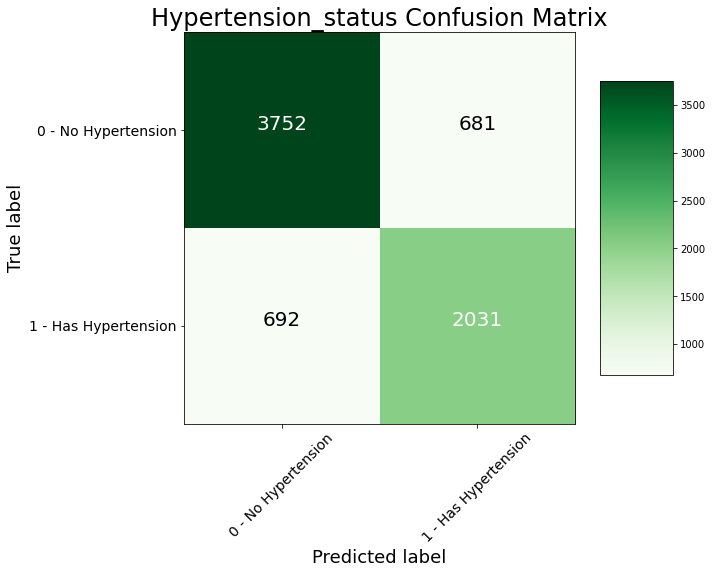

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),\
              fontsize = 20,\
              horizontalalignment="center",\
              color="white" if cm[i, j] > thresh else "black")
      plt.grid(None)
      plt.tight_layout()
      plt.ylabel('True label', size = 18)
      plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
logr_coeff_array = logr_model_vif_pip.named_steps['logr'].coef_
logr_coeff = logr_coeff_array.tolist()[0]

In [ ]:
# len(logr_coeff)

185

In [ ]:
# logr_coeff

In [ ]:
logr_cols = X_train_try.columns.tolist()

In [ ]:
# len(logr_cols)

185

In [ ]:
# logr_cols

In [ ]:
importancy = dict(zip(logr_cols, logr_coeff))

In [ ]:
# importancy.items()

dict_items([('age', 1.656191638180006), ('Height(cm)', -0.031073598962522066), ('Arm_Circumference', 0.2047559825475436), ('Waist_Circumference', 0.4383047582078179), ('Spending_on_nonfood', -0.01566931603339285), ('Spending_on_eating_out', -0.031012129462919882), ('Spending_on_carryout_deliverred', 0.025047515885698698), ('eat_outside', -0.008174332210167588), ('ready_to_eat_food', 0.004864364587527099), ('frozen_food', 0.001823557975359467), ('Sleep_hours', -0.023739661714607688), ('DR1DBIH', -0.062007284005018), ('DR1TNUMF', -0.04928624674977636), ('DR1TSUGR', -0.0007194459628636467), ('DR1TFIBE', -0.09003542094904728), ('DR1TCHOL', 0.03953864614230897), ('DR1TATOC', -0.08515606432176552), ('DR1TATOA', 0.043757259594731396), ('DR1TRET', 0.020770420005426473), ('DR1TACAR', -0.02130268418318463), ('DR1TBCAR', -0.002509184642549484), ('DR1TCRYP', 0.01530829214202323), ('DR1TLYCO', 0.005209796072320579), ('DR1TLZ', -0.019505430214263972), ('DR1TVB1', 0.012267784761651369), ('DR1TVB2', -

In [ ]:
# print(importancy)

{'age': 1.656191638180006, 'Height(cm)': -0.031073598962522066, 'Arm_Circumference': 0.2047559825475436, 'Waist_Circumference': 0.4383047582078179, 'Spending_on_nonfood': -0.01566931603339285, 'Spending_on_eating_out': -0.031012129462919882, 'Spending_on_carryout_deliverred': 0.025047515885698698, 'eat_outside': -0.008174332210167588, 'ready_to_eat_food': 0.004864364587527099, 'frozen_food': 0.001823557975359467, 'Sleep_hours': -0.023739661714607688, 'DR1DBIH': -0.062007284005018, 'DR1TNUMF': -0.04928624674977636, 'DR1TSUGR': -0.0007194459628636467, 'DR1TFIBE': -0.09003542094904728, 'DR1TCHOL': 0.03953864614230897, 'DR1TATOC': -0.08515606432176552, 'DR1TATOA': 0.043757259594731396, 'DR1TRET': 0.020770420005426473, 'DR1TACAR': -0.02130268418318463, 'DR1TBCAR': -0.002509184642549484, 'DR1TCRYP': 0.01530829214202323, 'DR1TLYCO': 0.005209796072320579, 'DR1TLZ': -0.019505430214263972, 'DR1TVB1': 0.012267784761651369, 'DR1TVB2': -0.0835242362127419, 'DR1TNIAC': 0.0050630976057205014, 'DR1TVB

In [ ]:
# importancy.keys()

dict_keys(['age', 'Height(cm)', 'Arm_Circumference', 'Waist_Circumference', 'Spending_on_nonfood', 'Spending_on_eating_out', 'Spending_on_carryout_deliverred', 'eat_outside', 'ready_to_eat_food', 'frozen_food', 'Sleep_hours', 'DR1DBIH', 'DR1TNUMF', 'DR1TSUGR', 'DR1TFIBE', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFA', 'DR1TFF', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TCALC', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS080', 'DR1TS120', 'DR1TS180', 'DR1TM161', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR2EXMER', 'DR2DBIH', 'DR2TNUMF', 'DR2TSUGR', 'DR2TFIBE', 'DR2TCHOL', 'DR2TATOC', 'DR2TATOA', 'DR2TRET', 'DR2TACAR', 'DR2TBCAR', 'DR2TCRYP', 'DR2TLYCO', 'DR2TLZ', 'DR2TVB1', 'DR2TVB2', 'DR2TNIAC', 'DR2TVB6', 'DR2

In [ ]:
for k in sorted(importancy, key=importancy.get, reverse=True):
  print(k, importancy[k])

age 1.656191638180006
Waist_Circumference 0.4383047582078179
race_dummy_4.0 0.30736678455474525
Arm_Circumference 0.2047559825475436
race_dummy_5.0 0.15472049424521056
Education_dummy_2.0 0.13494533952063023
Education_dummy_3.0 0.13450682249479615
DR2TP183 0.13441426262866327
Education_dummy_4.0 0.1099064418087329
DR1TP182 0.10956334027446896
DBQ095Z_x_4.0 0.10164804377142797
DR1TSODI 0.0872954222752178
DR1TP225 0.08328960953105519
DR1TSELE 0.07956047640642204
Education_dummy_5.0 0.07644877211185906
DR2TVB12 0.07280007456418083
DR1TCALC 0.06601351848181725
DR2TM201 0.06041008610862631
DR2TALCO 0.059853662113063436
DBQ095Z_x_3.0 0.056127241853760286
DR1TALCO 0.054086846340976734
DR2TVB6 0.052607240695472166
DR1TFF 0.05102610743867528
DR2DBIH 0.04975231505797009
DR2TLYCO 0.04786337306299501
DBQ095Z_x_2.0 0.047289503193447095
DR2TSUGR 0.047288581380303375
DR2TP204 0.046597839942916316
DR2DAY_6.0 0.04581444545290189
DR2DAY_5.0 0.04492645971713955
DR1TATOA 0.043757259594731396
race_dummy_3.

## Random Forest

In [ ]:
# Create the model with 100 trees
rf_model_vif = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf_model_vif.fit(X_train_try, y_train)
# Actual class predictions
rf_predictions = rf_model_vif.predict(X_valid_try)

train_probs = rf_model_vif.predict_proba(X_train_try)[:,1] 
probs = rf_model_vif.predict_proba(X_valid_try)[:, 1]
train_predictions = rf_model_vif.predict(X_train_try)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print("Accuracy = ", accuracy_score(y_valid, rf_predictions))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')
print(f'Train F1: {f1_score(y_train, train_predictions)}')
print(f'Test F1: {f1_score(y_valid, rf_predictions)}')

Accuracy =  0.7977920626048072
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8752594117881455
Train F1: 1.0
Test F1: 0.7317886932344764


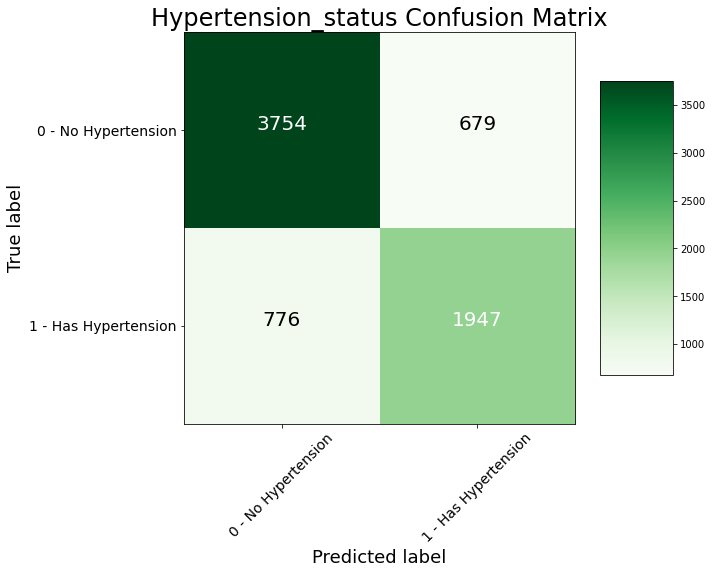

In [ ]:
cm = confusion_matrix(y_valid, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
feat_labels = X_train_try
feature_importance = []
# Print the name and gini importance of each feature
for feature in zip(feat_labels, rf_model_vif.feature_importances_):
    feature_importance.append(feature)

sorted(feature_importance, key=lambda x: x[1], reverse=True)

[('age', 0.1531876617647872),
 ('Waist_Circumference', 0.06171908138324325),
 ('Arm_Circumference', 0.03291296728936617),
 ('have_diabetes_1_dummy_2.0', 0.02451924458620687),
 ('DR2TCAFF', 0.013693889780098134),
 ('Height(cm)', 0.013622897784649375),
 ('Vigorous_recreational_activities_1_dummy_2.0', 0.011823900616380618),
 ('DR1TCAFF', 0.011515525911736275),
 ('Sleep_hours', 0.01044601937305093),
 ('DR1TSUGR', 0.008453920562978123),
 ('DR2TMOIS', 0.008258950765355566),
 ('DR2TNUMF', 0.00812455202587287),
 ('DR1TMOIS', 0.007961897451498064),
 ('blood_transfusion_1_dummy_2.0', 0.00793162631077431),
 ('had_trouble_sleeping_1_dummy_2.0', 0.007886872652314806),
 ('DR2TBCAR', 0.0075862020334114535),
 ('DR2TSUGR', 0.0073936572695560586),
 ('DR2TCALC', 0.007376704819905553),
 ('DR2TLZ', 0.007224005522444994),
 ('DR2TFA', 0.006938280605267736),
 ('Spending_on_eating_out', 0.006893215620541974),
 ('DR2TVK', 0.00685401168978233),
 ('DR2TACAR', 0.006776130526826004),
 ('DR1TLZ', 0.0067654289763251

## Decision Tree

In [ ]:
tree_params = {'max_depth': range(2, 12)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)

locally_best_tree.fit(X_train_try, y_train)

print("The best depth：{}".format(locally_best_tree.best_params_))

The best depth：{'max_depth': 4}


In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini",max_depth=4, random_state=17)
decision_tree.fit(X_train_try, y_train)

DecisionTreeClassifier(max_depth=4, random_state=17)

In [ ]:
y_pred = pd.Series(decision_tree.predict(X_valid_try))
y_train_pred = pd.Series(decision_tree.predict(X_train_try))

y_pred_proba = decision_tree.predict_proba(X_valid_try)[::,1]
y_train_proba = decision_tree.predict_proba(X_train_try)[::,1]


print ("Accuracy = ", accuracy_score(y_valid, y_pred))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_proba)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, y_pred_proba)}')
print(f'Train F1: {f1_score(y_train, y_train_pred)}')
print(f'Test F1: {f1_score(y_valid, y_pred)}')

Accuracy =  0.7993292342090553
Train ROC AUC Score: 0.8755950054276221
Test ROC AUC  Score: 0.8691025369025204
Train F1: 0.7526766595289078
Test F1: 0.7431127012522362


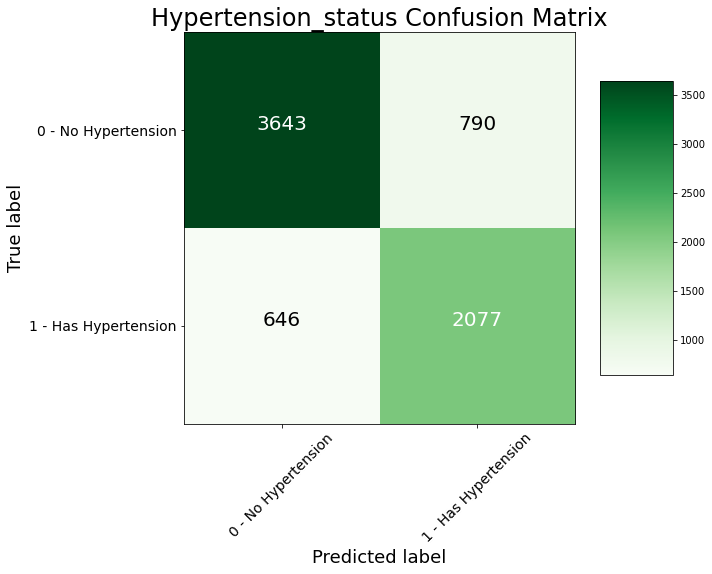

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
# import graphviz

# feature_name = X_train_try.columns
# dot_data = export_graphviz(decision_tree, out_file =None, feature_names=feature_name, class_names=["no_hypertension","has_hypertension"])
# graph = graphviz.Source(dot_data)
# graph

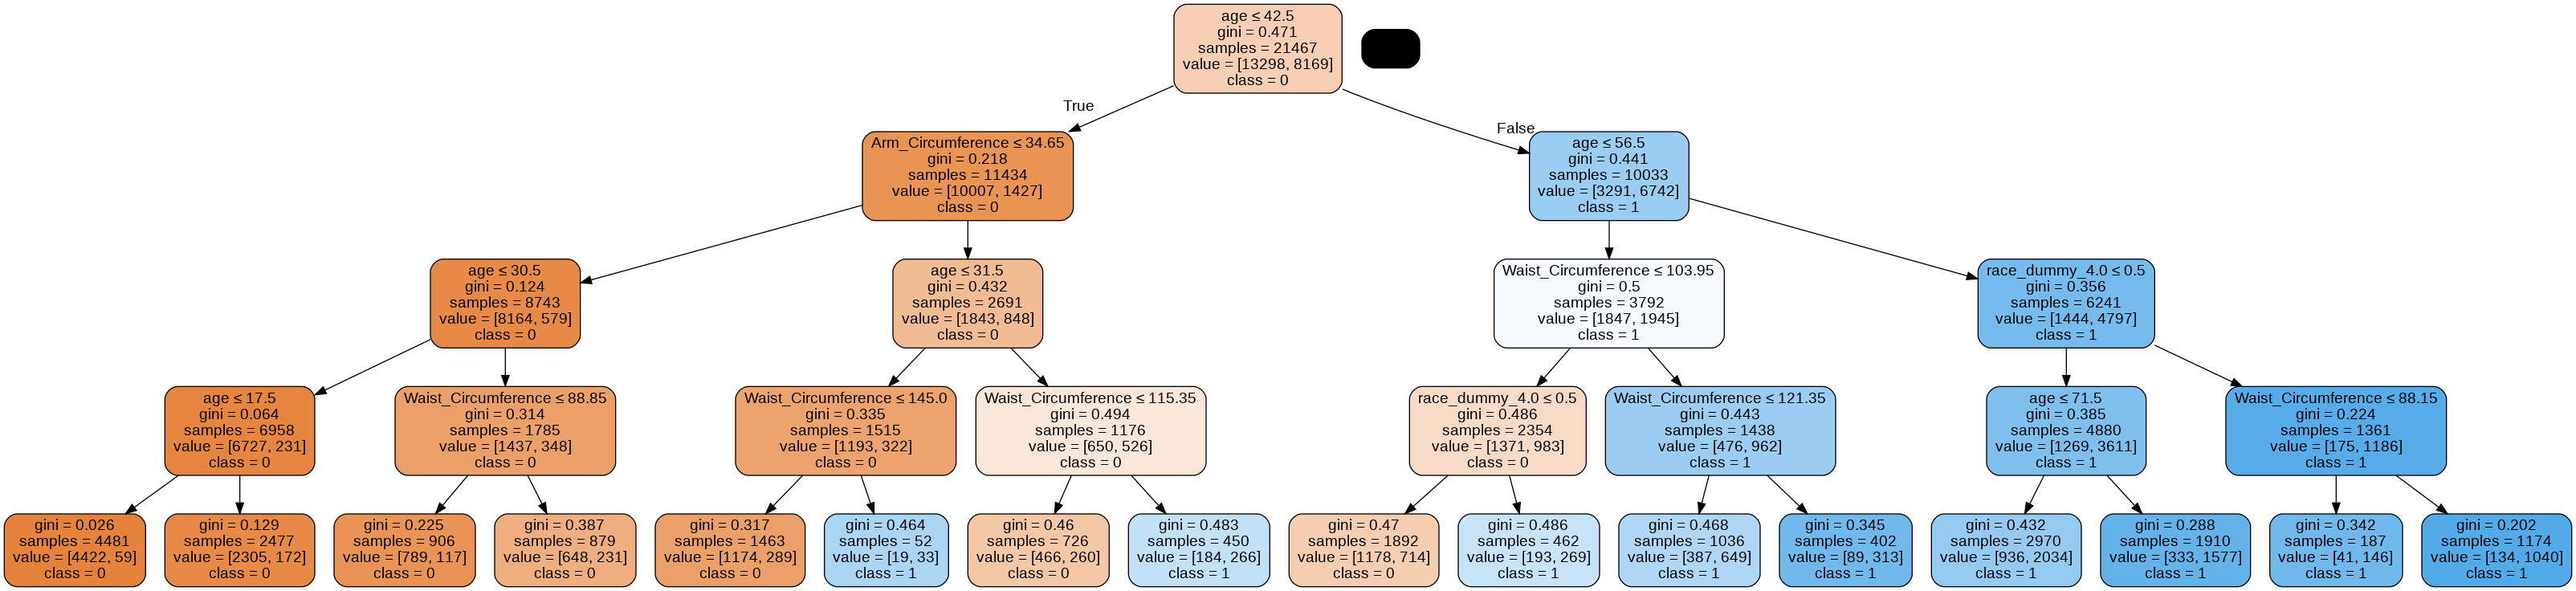

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_name = X_train_try.columns
 
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_name,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
for name, importance in zip(X_train_try.columns, decision_tree.feature_importances_):
    print(name, importance)

age 0.877539260278983
Height(cm) 0.0
Arm_Circumference 0.06027287749652413
Waist_Circumference 0.0461230379430739
Spending_on_nonfood 0.0
Spending_on_eating_out 0.0
Spending_on_carryout_deliverred 0.0
eat_outside 0.0
ready_to_eat_food 0.0
frozen_food 0.0
Sleep_hours 0.0
DR1DBIH 0.0
DR1TNUMF 0.0
DR1TSUGR 0.0
DR1TFIBE 0.0
DR1TCHOL 0.0
DR1TATOC 0.0
DR1TATOA 0.0
DR1TRET 0.0
DR1TACAR 0.0
DR1TBCAR 0.0
DR1TCRYP 0.0
DR1TLYCO 0.0
DR1TLZ 0.0
DR1TVB1 0.0
DR1TVB2 0.0
DR1TNIAC 0.0
DR1TVB6 0.0
DR1TFA 0.0
DR1TFF 0.0
DR1TVB12 0.0
DR1TB12A 0.0
DR1TVC 0.0
DR1TVD 0.0
DR1TCALC 0.0
DR1TMAGN 0.0
DR1TIRON 0.0
DR1TZINC 0.0
DR1TCOPP 0.0
DR1TSODI 0.0
DR1TPOTA 0.0
DR1TSELE 0.0
DR1TCAFF 0.0
DR1TTHEO 0.0
DR1TALCO 0.0
DR1TMOIS 0.0
DR1TS040 0.0
DR1TS080 0.0
DR1TS120 0.0
DR1TS180 0.0
DR1TM161 0.0
DR1TM201 0.0
DR1TM221 0.0
DR1TP182 0.0
DR1TP183 0.0
DR1TP184 0.0
DR1TP204 0.0
DR1TP205 0.0
DR1TP225 0.0
DR2EXMER 0.0
DR2DBIH 0.0
DR2TNUMF 0.0
DR2TSUGR 0.0
DR2TFIBE 0.0
DR2TCHOL 0.0
DR2TATOC 0.0
DR2TATOA 0.0
DR2TRET 0.0
DR2TA

## XGboost

In [ ]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train_try, y_train) #For sklearn no one hot encoding

#Now predict using the trained XG model. 
xgboost_prediction = xgboost_model.predict(X_valid_try)

# Actual class predictions

train_probs = xgboost_model.predict_proba(X_train_try)[:,1] 
probs = xgboost_model.predict_proba(X_valid_try)[:, 1]
xgboost_train_predictions = xgboost_model.predict(X_train_try)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Accuracy = ", accuracy_score(y_valid, xgboost_prediction))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')
print(f'Train F1: {f1_score(y_train, xgboost_train_predictions)}')
print(f'Test F1: {f1_score(y_valid, xgboost_prediction)}')

Accuracy =  0.8056176634991615
Train ROC AUC Score: 0.9012186462321995
Test ROC AUC  Score: 0.886830890313766
Train F1: 0.7677628420547288
Test F1: 0.7487809283005237


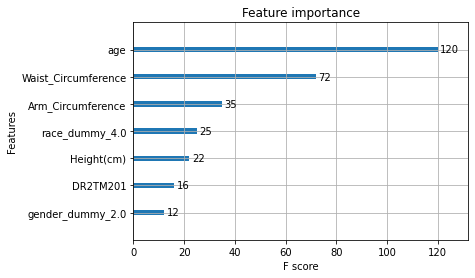

In [ ]:
from xgboost import plot_importance
plot_importance(xgboost_model, max_num_features=7)